In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print(" Linear SVM Performance:")
print(classification_report(y_test, y_pred_linear))
print(" Accuracy:", accuracy_score(y_test, y_pred_linear))

 Linear SVM Performance:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

 Accuracy: 0.956140350877193


In [6]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(" RBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_rbf))
print(" Accuracy:", accuracy_score(y_test, y_pred_rbf))

 RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

 Accuracy: 0.9736842105263158


In [7]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)

y_pred_tuned = svm_tuned.predict(X_test)

print(" Tuned RBF SVM Performance:")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy:", accuracy_score(y_test, y_pred_tuned))

 Tuned RBF SVM Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

 Accuracy: 0.9824561403508771


In [8]:
svm_tuned = SVC(kernel='rbf', C=0.1, gamma=1)
svm_tuned.fit(X_train, y_train)

y_pred_tuned = svm_tuned.predict(X_test)

print(" Tuned RBF SVM Performance:")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy:", accuracy_score(y_test, y_pred_tuned))

 Tuned RBF SVM Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

 Accuracy: 0.6228070175438597


In [9]:
svm_tuned = SVC(kernel='rbf', C=1, gamma=0.1)
svm_tuned.fit(X_train, y_train)

y_pred_tuned = svm_tuned.predict(X_test)

print(" Tuned RBF SVM Performance:")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy:", accuracy_score(y_test, y_pred_tuned))

 Tuned RBF SVM Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

 Accuracy: 0.9649122807017544


In [10]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)

y_pred_tuned = svm_tuned.predict(X_test)

print(" Tuned RBF SVM Performance:")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy:", accuracy_score(y_test, y_pred_tuned))

 Tuned RBF SVM Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

 Accuracy: 0.9824561403508771


In [11]:
svm_tuned = SVC(kernel='rbf', C=100, gamma=0.001)
svm_tuned.fit(X_train, y_train)

y_pred_tuned = svm_tuned.predict(X_test)

print(" Tuned RBF SVM Performance:")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy:", accuracy_score(y_test, y_pred_tuned))

 Tuned RBF SVM Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

 Accuracy: 0.9824561403508771


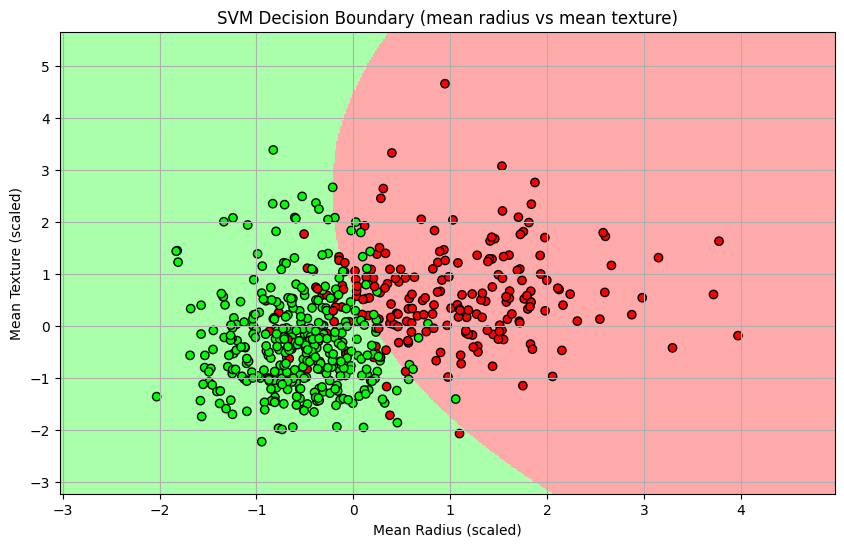

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use just 2 features for visualization
X_vis = X[['mean radius', 'mean texture']].values
y_vis = y.values

# Scale
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Train with best params
svm_vis = SVC(kernel='rbf', C=10, gamma=0.01)
svm_vis.fit(X_vis_scaled, y_vis)

# Meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k')
plt.title("SVM Decision Boundary (mean radius vs mean texture)")
plt.xlabel("Mean Radius (scaled)")
plt.ylabel("Mean Texture (scaled)")
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(SVC(kernel='rbf', C=10, gamma=0.01), X_scaled, y, cv=5)

print(" Cross-validation scores:", cv_scores)
print(" Average accuracy:", cv_scores.mean())

 Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
 Average accuracy: 0.9789318428815401
